In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Dataset\\train\\0\\Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


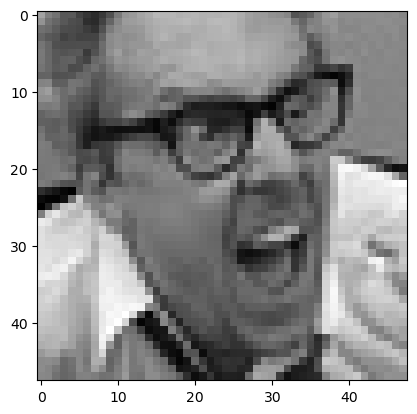

In [5]:
plt.imshow(img_array)

In [6]:
Data_directory= "Dataset\\train"

In [7]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

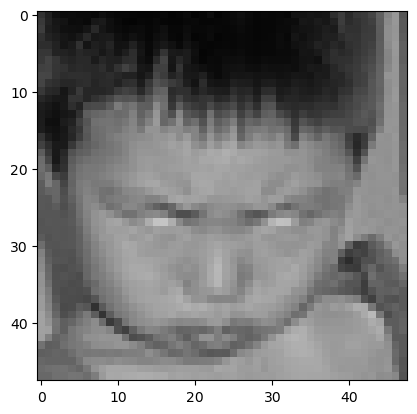

In [8]:
for catergory in Classes:
    path = os.path.join(Data_directory, catergory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

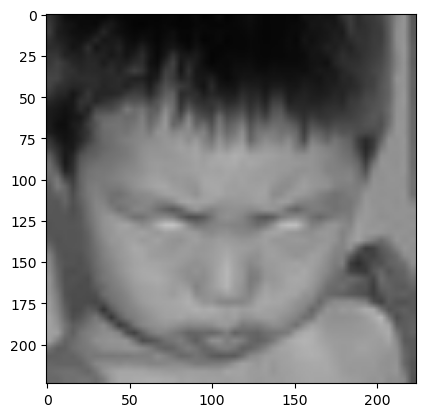

In [9]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_data = []

def create_training_data():
    for catergory in Classes:
        path = os.path.join(Data_directory, catergory)
        class_num = Classes.index(catergory)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [12]:
create_training_data()

In [13]:
print(len(training_data))


26684


In [14]:
import random
random.shuffle(training_data)

In [15]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)    

In [16]:
X.shape

(26684, 224, 224, 3)

In [17]:
X = X/255.0

In [18]:
type(y)

list

In [19]:
Y = np.array(y)

In [20]:
Y.shape

(26684,)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2()

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [24]:
base_input  = model.layers[0].input

In [25]:
base_output = model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [31]:
new_model.compile(loss = "sparse_catergorial_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [32]:
#new_model.fit(X,Y, epochs = 25)

In [33]:
new_model.save('my_model.keras')

In [34]:
new_model = tf.keras.models.load_model('my_model.keras')

In [35]:
new_model.evaluate

<bound method Model.evaluate of <keras.src.engine.functional.Functional object at 0x00000283FABDC690>>

In [36]:
frame  = cv2.imread("data\\happy\\05-12-21-happy-people.jpg")

In [37]:
frame.shape

(880, 1400, 3)

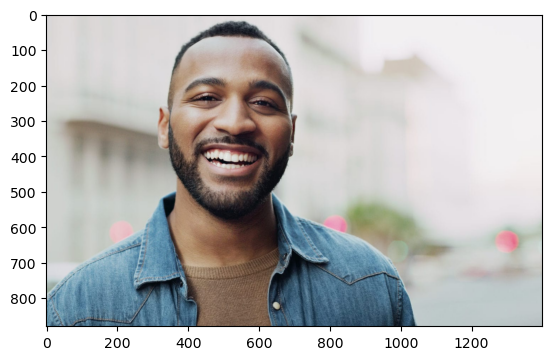

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(880, 1400)

In [42]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

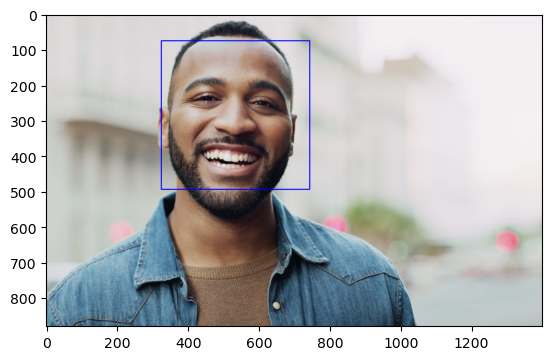

In [43]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

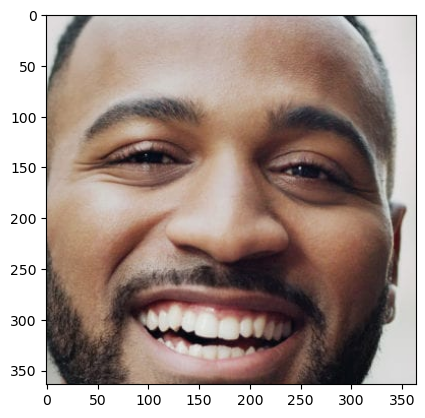

In [44]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [45]:
final_image  = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [46]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 3s 3s/step


In [47]:
Predictions[0]

array([0.18821925, 0.10776   , 0.06621546, 0.15424101, 0.34396952,
       0.02913336, 0.11046141], dtype=float32)

In [48]:
np.argmax(Predictions)

4

REAL TIME LIVE 

In [49]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
img = np.zeros((500,500))
text = "Some text in a box"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y),font, fontScale = font_scale, color = (0, 0, 0), thickness = 1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open web camera")
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image  = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(Predictions) == 0):
        status = "Angry"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==2):
        status = "fear"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))    
    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==4):
        status = "Sad"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==5):
        status = "Suprise"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==6):
        status = "Neutral"
        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0,), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
        cv2.putText(frame, status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,255))

    cv2.imshow("Face Emotion Recognition", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 93ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 133ms/step
Face not detected
1/1 [==============================] - 0s 112ms/step
Face not detected
1/1 [==============================] - 0s 105ms/step
Face not detected
1/1 [==============================] - 0s 114ms/step
Face not detected
1/1 [==============================] - 0s 99ms/step
Face not detected
1/1 [==============================] - 0s 102ms/step
Face not detected
1/1 [==============================] - 0s 121ms/step
Face not detected
1/1 [==============================] - 0s 88ms/step
Face not detected
1/1 [==============================] - 0s 120ms/step
Face not detected
1/1 [==============================] - 0s 111ms/step
Face not detected
1/1 [==============================] - 0s 127ms/step
Face not detected
1/1 [==============================] - 0s 111ms/step
Face not detected
1/1 [=====

KeyboardInterrupt: 